In [1]:
# p20 연습
# 아래는 대출자들의 채무 상환과 관련된 데이터이다. 상환 여부를 예측하기 위한 로지스틱 회귀분석을 실시하고 결과를 해석하시오.
# 데이터 : HMEQ.csv(변수 :13개, 자료 수 : 3,748개)

# 1. 데이터 구성하기
# 2. 데이터 전처리
# 3. 로지스틱 회귀모델 및 회귀계수 검토
# 4. 예측 및 성능 평가
# 5. 결론 도출

import pandas as pd # 데이터 구성 : Series, DataFrame
import numpy as np # 행렬 연산
import matplotlib # 데이터 시각화
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from statsmodels.api import Logit

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False
# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [3]:
# p22 연습

# 데이터 구성하기
df_raw = pd.read_csv("/home/piai/다운로드/2주차 실습파일/2. Big Data 분석/HMEQ.csv")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [4]:
# p22 연습

# 데이터 구성하기 - 확인
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      3748 non-null   int64  
 1   LOAN     3748 non-null   int64  
 2   MORTDUE  3748 non-null   int64  
 3   VALUE    3734 non-null   float64
 4   REASON   3748 non-null   object 
 5   JOB      3667 non-null   object 
 6   YOJ      3543 non-null   float64
 7   DEROG    3748 non-null   int64  
 8   DELINQ   3718 non-null   float64
 9   CLAGE    3711 non-null   float64
 10  NINQ     3692 non-null   float64
 11  CLNO     3748 non-null   int64  
 12  DEBTINC  3748 non-null   float64
dtypes: float64(6), int64(5), object(2)
memory usage: 380.8+ KB


In [5]:
# P22 연습

print("Data 구조:", df_raw.shape) # 데이터 수 체크
print("변수:", df_raw.columns) # 열 체크

Data 구조: (3748, 13)
변수: Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')


In [6]:
# p23 연습
# 데이터 전처리 - 결측치 확인 및 처리

# 결측치 확인
df_raw.isnull().sum(axis = 0)

# VALUE는 14개의 결측치, JOB은 81개의 결측치, ... 등을 가짐

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [9]:
# p23 연습
# fillna : 결측치 대체 함수
# JOB 변수의 결측치는 "Other"로 대체, inplace : fillna 함수 적용 후 df_raw 데이터에 저장, False면 저장 안 함
df_raw["JOB"].fillna("Other", inplace = True)

# 숫자형 변수의 결측치는 해당 변수의 평균값 입력 : df_raw.mean()각 변수별 평균 계산 후 결측치 대체
df_raw.fillna(df_raw.mean(), inplace = True)

# 결측치 발생 원인 파악 후, 적절한 대체 방법 검토 필요

/tmp/ipykernel_25090/307055426.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_raw.fillna(df_raw.mean(), inplace = True)


In [10]:
# p24 연습
# 데이터 전처리 - 데이터 분할(train, test 데이터 7 : 3 비율로 분할)

# train_test_split(데이터, test_size = test 데이터 비율, randim_state : 랜덤)
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 1234)

print("train data size: {}".format(df_train.shape))
print("test data size: {}".format(df_test.shape))

# 본 과정에서는 동일한 분석 결과 생성을 위해 random_state = 1234로 지정
# 실제 과제에서는 random_state에 특정값을 지정하지 않는 것이 바람직함.

# train 데이터 2623건, test 데이터 1125건

train data size: (2623, 13)
test data size: (1125, 13)


In [12]:
# p25 연습
# 모델 및 회귀계수 검토

# from_formula 함수를 이용하여 변수 역할 지정
log_model = Logit.from_formula("""BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB) + YOJ + DEROG + DELINQ + CLAGE + NINQ + CLNO + DEBTINC""", df_train)

# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

# 목표변수 (BAD) ~ 설명변수 (LOAN, MORTDUE, VALUE, ...)
# -> (분석 대상 이벤트 / 수준 : 목표변수 정렬(Ascending) 기준 마지막 값 기준, "1")
# C(변수) : 범주형 변수 표시. 범주형 변수는 반드시 "C(대문자)" 표시해야 함

Optimization terminated successfully.
         Current function value: 0.237614
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2606
Method:                           MLE   Df Model:                           16
Date:                Thu, 08 Aug 2024   Pseudo R-squ.:                  0.2257
Time:                        12:27:36   Log-Likelihood:                -623.26
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 1.743e-67
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -5.0942      0.560     -9.100      0.000      -6.191      -3.997

In [ ]:
# 모델 및 회귀계수 검토
# No. Observations(전체 자료 수) : 2,623
# Df Residuals(잔차 자유도) : 2,606
# -> 잔차 자유도 (n - k)는 n은 데이터 개수, k는 미지수의 개수
# -> (2623 - 16 - 1) = 2606

# Df Model(모델 자유도) : 16 (intercept 제외 16개 있음)
# Pseudo R-squ. : 설명력 0.02257
# -> 로지스틱 회귀분석의 설명력은 낮음

# 회귀게수 유의성 검정
# z = coef/(std err), Wald검정, P>|z| : p-vaelue -> 유의한 변수 (유의수준 0.05 기준)
# JOB(C(JOB)[T.OFFICE], C(JOB)[T.Sales]), DEROG, DELINQ, CLAGE, NINQ, CLNO, DEBTINC
# --> 나머지 C(JOB)은 0.05보다 커서 그런듯??

# 변수 JOB은 유의 하다고 판단할 수 있음
# -> 회귀계수가 유의하지 않은 변수도 포함되 어있음
# LOAN, MORTDUE, VALUE, YOJ 등 -> 제외 REASON 변수는 어떻게 처리해야 하는가?

In [14]:
# p27 연습
# 모델 및 회귀계수 검토 - 변수 선택 (유의한 변수 선택 및 최종 모델 개발)

# 회귀계수가 유의한 변수만 사용한 모델
# 회귀계수 유의성 기준 제외변수 : REASON, LOAN, MORTDUE, VALUE, YOL
log_model = Logit.from_formula("""BAD ~ C(JOB) + DEROG + DELINQ + CLAGE + NINQ + CLNO + DEBTINC""", df_train)

# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

# 회귀계수가 유의한 변수만 선택하여 모델 개발

Optimization terminated successfully.
         Current function value: 0.238224
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2611
Method:                           MLE   Df Model:                           11
Date:                Thu, 08 Aug 2024   Pseudo R-squ.:                  0.2237
Time:                        12:49:41   Log-Likelihood:                -624.86
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 1.774e-70
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -5.1652      0.534     -9.664      0.000      -6.213      -4.118
C(JOB)[T

In [15]:
# 모델 및 회귀계수 검토 - 변수 선택

# No. Observations(전체 자료 수) : 2,623
# Df Residuals(잔차 자유도) : 2,611
# -> 잔차 자유도 (n - k)는 n은 데이터 개수, k는 미지수의 개수
# -> (2623 - 11 - 1) = 2611

# Df Model(모델 자유도) : 11 (intercept 제외 16개 있음)
# Pseudo R-squ. : 설명력 0.02237
# -> 약간 낮아짐

# 회귀계수 유의성 검정
# 유의 변수(< 0.05 기준) : 전체

In [18]:
# p29 연습
# 예측 및 성능 평가

# 예측
# train 데이터 예측
y_pred_train = log_result.predict(df_train)

# 0과 1의 값을 가진 class로 변환
y_pred_train_class = (y_pred_train > 0.5).astype(int) # <- "1/0" 판정 임계값(1 발생 확률) 변경 가능
print("Train 예측 결과 \n", y_pred_train_class.head(), "\n")
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["BAD"], y_pred_train_class)), "\n")

Train 예측 결과 
 3164    0
3314    1
93      0
1456    0
3327    0
dtype: int64 

Confusion Matrix: 
[[2368   14]
 [ 192   49]] 



In [23]:
# p29 연습
# 예측 및 성능 평가

# 예측
# test 데이터 예측
y_pred_test = log_result.predict(df_test)

# 0과1의 값을 가진 class로 변환
y_pred_test_class = (y_pred_test > 0.5).astype(int) # <- "1/0" 판정 임계값(1 발생 확률) 변경 가능
print("Test 예측 결과 \n", y_pred_test_class.head(), "\n")
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["BAD"], y_pred_test_class)), "\n")

Test 예측 결과 
 1721    0
822     0
1686    0
789     0
165     0
dtype: int64 

Confusion Matrix: 
[[1016    5]
 [  81   23]] 



In [24]:
###########################참조###############
# p29 연습
# 예측 및 성능 평가

# 예측
# 참조 : 0과 1의 값을 가진 class로 변환 : 임계값 변경 -> 예측 빈도 달라짐 -> 옆 결과 참조
# y_pred_test_class = (y_pred_test > 0.6).astype(int) # <- 임계값 0.5를 0.6으로 바꿈
# print("Test 예측 결과 - 임계값 변경 \n", y_pred_test_class[10:15].head(), "\n")
# print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["BAD"], y_pred_test_class)), "\n")

In [25]:
# p30 예측 및 성능 평가
# 평가

# 실제 train 데이터와 예측 결과 비교
print("Train 예측 / 분류 결과")
print("Accuracy : {0:.3f}\n".format(accuracy_score(df_train["BAD"], y_pred_train_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["BAD"], y_pred_train_class)), "\n")
print(classification_report(df_train["BAD"], y_pred_train_class, digits = 3))

Train 예측 / 분류 결과
Accuracy : 0.921

Confusion Matrix: 
[[2368   14]
 [ 192   49]] 

              precision    recall  f1-score   support

           0      0.925     0.994     0.958      2382
           1      0.778     0.203     0.322       241

    accuracy                          0.921      2623
   macro avg      0.851     0.599     0.640      2623
weighted avg      0.911     0.921     0.900      2623



In [26]:
# p30 예측 및 성능 평가
# 평가

# 실제 test 데이터와 예측 결과 비교
print("Test 예측 / 분류 결과")
print("Accuracy : {0:.3f}\n".format(accuracy_score(df_test["BAD"], y_pred_test_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["BAD"], y_pred_test_class)), "\n")
print(classification_report(df_test["BAD"], y_pred_test_class, digits = 3))

# 모델의 test 데이터 정분류율은 92.5%
# 분류 내용
# -> 실제 0을 0으로 분류 1016건
# -> 실제 1을 0으로 분류 81건

# "1" 기준 f1 score는 34.8% (precision은 높으나 recall이 매우 낮음)

Test 예측 / 분류 결과
Accuracy : 0.924

Confusion Matrix: 
[[1016    5]
 [  81   23]] 

              precision    recall  f1-score   support

           0      0.926     0.995     0.959      1021
           1      0.821     0.221     0.348       104

    accuracy                          0.924      1125
   macro avg      0.874     0.608     0.654      1125
weighted avg      0.916     0.924     0.903      1125



<Axes: >

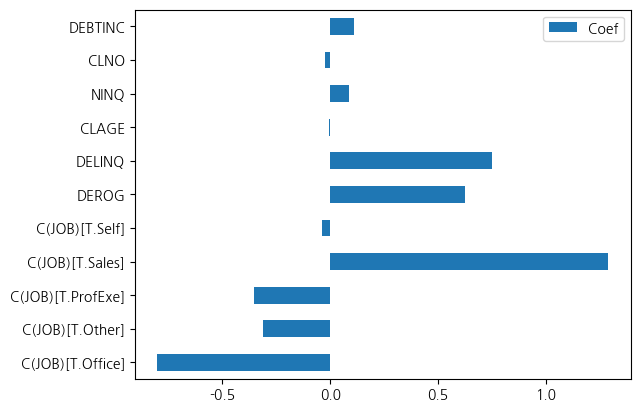

In [27]:
# p31 연습
# 결론 도출 - 최종 회귀식
# 최종 회귀식에는 모델에 사용된 모든 설명변수를 포함해야 함
# 즉, 회귀계수가 유의하지 않은 설명변수도 포함해야 함

# 설명변수 중요도
df_logistic_coef = pd.DataFrame({"Coef": log_result.params.values[1:]}, index = log_model.exog_names[1:])
# 절편을 제외하고 설명변수 출력하려고 
df_logistic_coef.plot.barh(y = "Coef")

# 참조 : 0번째 원소는 : intercept(절편)
# print(log_result.params.values[0:1]); print(log_model.exog_names[0:1])

# 직업이 Sales이거나, 연체된 신용 한도의 수(DELINQ)와 심각한 연체 수(DEROG)가 높을 경우
# 대출 채무 불이행(BAD)일 가능성이 높아짐. 부채 비율(DEBINC) 영향이 크지 않음

# 직업 = "OFFICE"이면 대출 채무 불이행(BAD)일 가능성이 오히려 낮아짐
# WOW신기

In [34]:
# p32 연습
# 결론 도출 - 표준화 회귀 계수

# select_dtypes : 특정 변수 타입을 선택 / 제외하여 데이터 추출
df_char = df_raw.select_dtypes(include = "object")
df_numeric = df_raw.select_dtypes(exclude = "object")

# Data Scalling
scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

# 문자 데이터 + 숫자 데이터
df_scaled = pd.concat([df_numeric_scaled, df_char], axis = 1)
df_scaled.head()

# BAD 변수도 scaling 적용(scale 대상에서 제외하거나 1/0로 재변환 필요)

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,3.140664,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,HomeImp,Other
1,3.140664,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,HomeImp,Other
2,-0.318404,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,HomeImp,Office
3,3.140664,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,HomeImp,Mgr
4,-0.318404,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,HomeImp,Office


In [35]:
# p33 연습
# 결론 도출 - 표준화 회귀 계수

# BAD 데이터를 0과 1로 변환(정수형), np.where(조건, 조건을 만족하는 경우, 만족하지 않는 경우)
df_scaled["BAD"] = np.where(df_scaled["BAD"] > 0, 1, 0)
df_scaled.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,1,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,HomeImp,Other
1,1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,HomeImp,Other
2,0,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,HomeImp,Office
3,1,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,HomeImp,Mgr
4,0,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,HomeImp,Office


In [36]:
# p33 연습
# 데이터 분할
df_scaled_train, df_scaled_test = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)
# train_test_split(데이터, test 데이터의 비율, random state)

In [40]:
# p34 연습
# 결론 도출 - 표준화 회귀 계수

# 선정된 설명변수 기준
scaled_log_model = Logit.from_formula("""BAD ~ C(JOB) + DEROG + DELINQ + CLAGE + NINQ + CLNO + DEBTINC""", df_scaled_train)

# 적합
scaled_log_result = scaled_log_model.fit()

# 결과 출력
print(scaled_log_result.summary())


Optimization terminated successfully.
         Current function value: 0.238224
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2611
Method:                           MLE   Df Model:                           11
Date:                Thu, 08 Aug 2024   Pseudo R-squ.:                  0.2237
Time:                        22:27:59   Log-Likelihood:                -624.86
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 1.774e-70
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.5153      0.197    -12.785      0.000      -2.901      -2.130
C(JOB)[T

<Axes: >

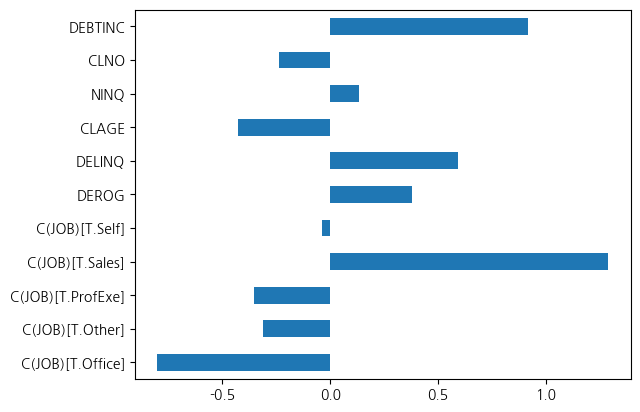

In [43]:
# p35 연습
# 결론 도출 - 표준화 회귀 계수

# 설명변수 중요도
df_log_scaled_coef = pd.DataFrame({"Coef": scaled_log_result.params.values[1:]},
                                 index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y = "Coef", legend = False)

# 직업, 부채비율, 신용 한도수 순으로 변수 중요도가 높음 C(JOB)( T.Sales, DEBTINC, DELINQ)
# 직업이 Scales이거나, 부채비율(DEBTINC)과 연체된 신용 한도의 수(DELINQ)가 높을 경우 대출 채무 불이행(BAD)일 가능성이 높아짐
# 특히 부채비율(DEBTINC)의 영향이 커짐

In [ ]:
# p36 실습
# 아래는 통신회사의 고객 이탈 데이터이다. 고객의 이탈 여부를 예측하기 위한 로지스틱 분석을 실시하고 결과를 해석하시오.
# 데이터 : 통신이탈고객.csv( 변수 : 15개, 자료 수 : 930개)

# 1. 데이터 구성하기
# 2. 데이터 전처리
# 3. 로지스틱 회귀모델 및 회귀계수 검토
# 4. 예측 및 성능 평가
# 5. 결론 도출

